# 03_model.ipynb
This notebook builds regression models to estimate sneaker resale price drivers and elasticity.
We use the processed features from `02_features.ipynb` to:
- Train linear and regularized regression models
- Interpret coefficients (e.g., brand premium, color effects)
- Quantify price elasticity and release-age relationships

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

DATA_PROCESSED = "C:\\Projects/sneaker_elasticity/data_processed/"

In [5]:
X = pd.read_csv(os.path.join(DATA_PROCESSED, "X_features.csv"))
y = pd.read_csv(os.path.join(DATA_PROCESSED, "y_target.csv")).squeeze() 

print(X.shape, y.shape)
X.head()

(1874, 7) (1874,)


,Retail_Price,Sneaker_Size,days_since_release,Brand_Air Jordan,Color_WHITE/CORE BLACK/RED,Color_WHITE/DARK POWDER BLUE,Color_WHITE/VARSITY RED-BLACK
0,1.027047,0.470574,-0.750018,0,0,0,0
1,1.027047,-0.075636,-0.754011,0,0,0,0
2,1.027047,-0.894950,-0.754011,0,0,0,0
3,1.027047,2.109203,-0.754011,0,0,0,0
4,1.027047,-0.075636,-0.758004,0,0,0,0


R²: 0.927
RMSE: 0.13


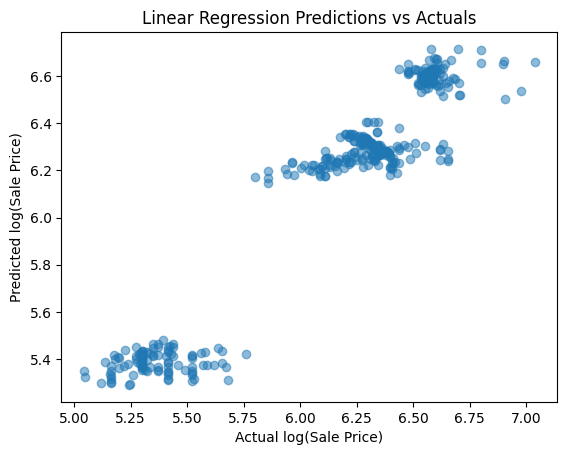

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual log(Sale Price)")
plt.ylabel("Predicted log(Sale Price)")
plt.title("Linear Regression Predictions vs Actuals")
plt.show()


In [11]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient
0,Retail_Price,0.398295
6,Color_WHITE/VARSITY RED-BLACK,0.273228
2,days_since_release,0.170673
1,Sneaker_Size,-0.032677
3,Brand_Air Jordan,-0.199077
4,Color_WHITE/CORE BLACK/RED,-0.262555
5,Color_WHITE/DARK POWDER BLUE,-0.472304


Ridge — R²: 0.927, RMSE: 0.13
Lasso — R²: 0.916, RMSE: 0.14


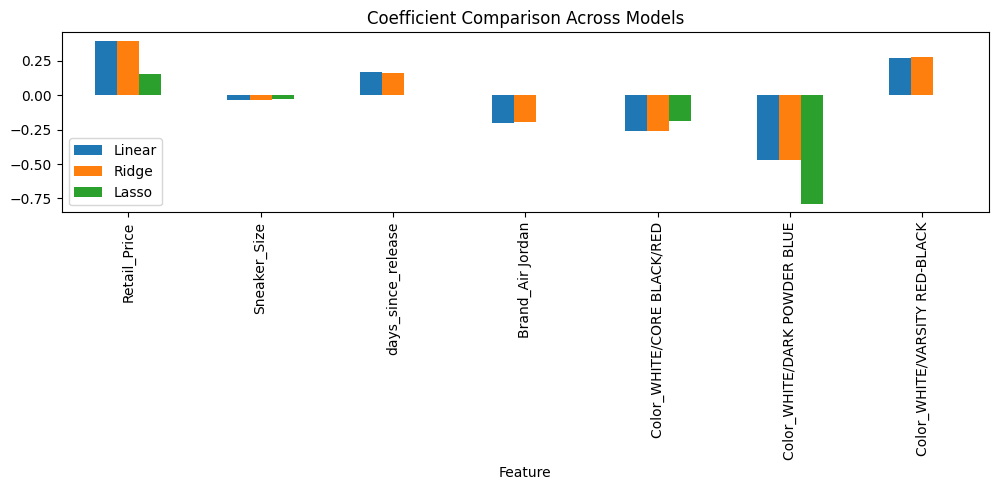

In [ ]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

for name, model in [("Ridge", ridge), ("Lasso", lasso)]:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print(f"{name} — R²: {r2:.3f}, RMSE: {rmse:.2f}")
    
coef_compare = pd.DataFrame({
    "Feature": X.columns,
    "Linear": lr.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
}).set_index("Feature")

coef_compare.plot(kind="bar", figsize=(10,5), title="Coefficient Comparison Across Models")
plt.tight_layout()
plt.show()

In [ ]:
price_coef = coef_df.loc[coef_df["Feature"] == "Retail_Price", "Coefficient"].values[0]
print(f"Retail Price Elasticity Coefficient: {price_coef:.3f}")

Retail Price Elasticity Coefficient: 0.398


In [ ]:
results = {
    "Linear": {
        "R2": r2_score(y_test, lr.predict(X_test)),
        "RMSE": mean_squared_error(y_test, lr.predict(X_test)) ** 0.5
    },
    "Ridge": {
        "R2": r2_score(y_test, ridge.predict(X_test)),
        "RMSE": mean_squared_error(y_test, ridge.predict(X_test)) ** 0.5
    },
    "Lasso": {
        "R2": r2_score(y_test, lasso.predict(X_test)),
        "RMSE": mean_squared_error(y_test, lasso.predict(X_test)) ** 0.5
    },
}

pd.DataFrame(results).to_csv(os.path.join(DATA_PROCESSED, "model_results.csv"))

## Summary
- Created timedelta & OHE features
- Scaled featues
- Output featues & target CSVs for model creation.